In [311]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import requests
import time
from bs4 import BeautifulSoup
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt

In [359]:
headers = {
    'accept': '*/*',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.79 Safari/537.36'    
}

base_url='https://hh.ru/search/vacancy?search_period=30&clusters=true&area=113&text=data+engineer&enable_snippets=true'

# На выходе получаем словарь --> {page_num : [(job_title, job_href), ..,]}
session = requests.Session()
all_vacancies = []
vacancies = {}

for page_num in range(40):    
    html = session.get(base_url + f'&page={page_num}', headers=headers).content
    soup = BeautifulSoup(html, 'html.parser')

    div_vacancies = soup.find_all(
        'div', 
        attrs={'data-qa': ['vacancy-serp__vacancy', 'vacancy-serp__vacancy vacancy-serp__vacancy_premium']})
    
    a_vacancies = [div.find('a', attrs={'data-qa': 'vacancy-serp__vacancy-title'}) for div in div_vacancies]

    vacancies[page_num] = []
    for a in a_vacancies:
        all_vacancies.append((a.text, a['href']))
        vacancies[page_num].append((a.text, a['href']))
    
    if all_vacancies[-1] == all_vacancies[-2]:
        break
    else:   
        print(f'Page #{page_num}, first vacancy --> {all_vacancies[-1]}')
    
    time.sleep(1)

Page #0, first vacancy --> ('Senior Mobile Developer', 'https://hh.ru/vacancy/35044841?query=data%20engineer')
Page #1, first vacancy --> ('Специалист технической поддержки / Customer support engineer', 'https://hh.ru/vacancy/34906947?query=data%20engineer')
Page #2, first vacancy --> ('Senior Linux Engineer', 'https://hh.ru/vacancy/35003477?query=data%20engineer')
Page #3, first vacancy --> ('Artificial Intelligence and Data Analytics Scientist', 'https://hh.ru/vacancy/35144225?query=data%20engineer')
Page #4, first vacancy --> ('Data Engineer', 'https://hh.ru/vacancy/35117533?query=data%20engineer')
Page #5, first vacancy --> ('Data scientist / Специалист машинного обучения', 'https://hh.ru/vacancy/34964095?query=data%20engineer')
Page #6, first vacancy --> ('Big Data Engineer (with a long-term business trip to the USA)', 'https://hh.ru/vacancy/35091499?query=data%20engineer')
Page #7, first vacancy --> ('Lead Data Engineer/Data Scientist', 'https://hh.ru/vacancy/35074592?query=data%

In [360]:
need_titles = [
    'data engineer', 
    'data-engineer', 
    'big data', 
    'bigdata', 
    'dwh', 
    'дата-инженер', 
    'дата инженер',
    'инженер данных',
    'hadoop']

data = []
counter = 0

for title, href in all_vacancies:
    title = title.lower()
    if not any([t in title for t in need_titles]):
        continue 
   
    counter += 1    
    html = session.get(href, headers=headers).content
    soup = BeautifulSoup(html, 'html.parser')
        
    vacancy_desc = soup.find('div', {'class': 'vacancy-description'})

    experience = vacancy_desc.find('span', attrs={'data-qa': 'vacancy-experience'}).text
    salary = vacancy_desc.find('p', attrs={'class': 'vacancy-salary'})
    core_skills = []
    
    for div in soup.find_all('div', attrs={'class': 'vacancy-section'}):
        header = div.find('h2')
        if isinstance(header, Tag) and header.text.lower() == 'ключевые навыки':
            core_skills = list(set([span.text for span in div.find_all('span')]))
    
#     print(f'Title: {title}')
#     print(f'Link : {href}')
#     print(f'Exptected experience: {experience}')
#     print(f'Salary              : {salary}')
#     print(f'Core skills         : {core_skills}')
#     print('\n')
    
    data.append((title, experience, salary, core_skills))

print(f'Найдено {counter}/{len(all_vacancies)} релевантных вакансий по ключевым словам.')

Найдено 151/800 релевантных вакансий по ключевым словам.


In [361]:
required_skills = list(map(lambda skill: skill.lower(), chain(*[vac[-1] for vac in data])))
dct = Counter(required_skills)

100.0

TypeError: 'builtin_function_or_method' object is not iterable

In [365]:
sum(pls.values())

188

Text(0.5, 1.0, 'Programming language usage (85 vacancies)')

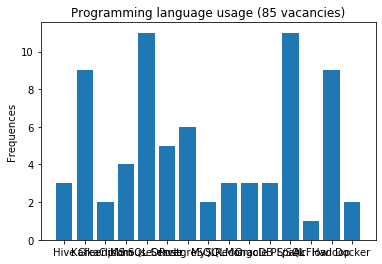

In [356]:
frameworks_and_databases = {
    'Hive': dct['hive'],
    'Kafka': dct['kafka'],
    'Greenplum': dct['greenplum'],
    'Clickhouse': dct['clickhouse'],
    'MS SQL Server': dct['ms sql server'] + dct['ms sql'],
    'Oracle': dct['oracle'] + dct['база данных: oracle'],
    'PostgreSQL': dct['postgresql'],
    'MySQL': dct['mysql'],
    'Redis': dct['redis'],
    'MongoDB': dct['mongodb'],
    'Oracle PL/SQL': dct['oracle pl/sql'],
    'Spark': dct['spark'],
    'AirFlow': dct['airflow'],
    'Hadoop': dct['hadoop'] + dct['hdfs'],
    'Docker': dct['docker']
}

x = frameworks_and_databases.keys()
y = frameworks_and_databases.values()
y_pos = np.arange(len(x))

plt.bar(y_pos, y, align='center')
plt.xticks(y_pos, x)
plt.ylabel('Frequences')
plt.title('Programming language usage (85 vacancies)')

In [342]:
dct

Counter({'hive': 3,
         'nosql': 2,
         'python': 33,
         'presto': 1,
         'data pipeline': 1,
         'kafka': 9,
         'java': 15,
         'google cloud': 1,
         'тренинги': 1,
         'английский язык': 3,
         'greenplum': 2,
         'английский\xa0— a1 — начальный': 1,
         'big data': 9,
         'clickhouse': 4,
         'публичные выступления': 1,
         'обучение и развитие': 2,
         'c++': 6,
         'ms sql server': 4,
         'ms powerpoint': 1,
         'sql': 37,
         'json api': 1,
         'transact-sql': 1,
         'xml': 1,
         'bash': 1,
         'linux': 8,
         'sas': 1,
         'oracle': 4,
         'spark': 11,
         'oracle pl/sql': 3,
         'математическое моделирование': 1,
         'машинное обучение': 1,
         'data analysis': 3,
         'matlab': 1,
         'scrum': 2,
         'английский\xa0— c1 — продвинутый': 2,
         'data mining': 5,
         'ms sql': 7,
         'сборка вит